In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_theme()
sns.set_palette("vlag")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pycaret.datasets import get_data


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
total_df = pd.read_csv('../data/DataFrames/total_df', sep = ',')
total_df = total_df.drop_duplicates(subset = 'Joueur')
total_df = total_df.set_index('Joueur')
total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,j19,j18,j17,j16,j15,j14,j13,j12,j11,j10,j9,j8,j7,j6,j5,j4,j3,j2,j1,j38,j37,j36,j35,j34,j33,j32,j31,j30,j29,j28,j27,j26,j25,j24,j23,j22,j21,j20,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,0.00,1.49,13,0,32,0.88,0.00,0.94,1361,35,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,4.5,6.12,5.00,6.50,6.5,5.00,6.00,8.00,7.00,5.00,6.0,5.00,5.0,7.5,6.5,4.50,9.00,7.0,6.12,8.5,8.00,6.0,8.00,4.00,7.00,5.00,9.00,9.00,3.50,7.00,6.12,8.00,5.0,6.00,6.50,6.50,7.00,5.00,7.5,2.0,0.0,2.0,2.0,12.0,32.0,0.8256,891.0,3.0,2.0,37.91,9.0,0.0,0.0,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,0.00,1.40,11,0,21,0.88,1.00,0.93,1325,180,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,4.5,4.50,6.38,6.00,5.5,7.50,7.50,6.38,6.50,4.50,5.0,6.00,6.5,6.0,6.5,6.50,9.00,7.5,9.00,7.0,6.38,6.5,6.50,6.00,6.38,7.00,9.00,8.00,4.00,6.00,4.50,5.50,4.5,6.38,6.38,6.38,6.38,6.38,7.0,2.0,0.0,0.0,10.0,12.0,10.0,0.8212,1381.0,2.0,12.0,49.51,22.0,0.0,0.0,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,1.41,1.30,8,1,13,1.00,1.00,0.97,1312,180,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,5.0,7.00,7.03,7.03,5.5,7.03,7.00,8.00,5.50,7.03,7.0,8.00,7.5,8.0,8.0,5.00,8.00,7.0,9.00,8.0,8.00,5.0,5.50,7.00,7.03,4.50,8.00,6.50,7.03,6.00,4.00,7.50,6.0,6.00,8.00,5.50,7.03,7.03,9.0,0.0,1.0,2.0,10.0,15.0,21.0,0.8355,1240.0,0.0,11.0,51.52,3.0,0.0,0.0,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,0.00,1.01,3,0,4,0.76,0.00,0.81,1211,34,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,4.5,5.38,4.00,5.00,7.0,5.00,5.38,4.00,6.00,5.00,4.0,5.00,5.5,5.0,4.5,5.00,7.50,7.0,7.50,6.0,5.00,5.0,6.00,5.00,6.50,5.00,5.50,5.50,3.50,6.50,5.38,5.38,5.0,6.00,5.50,5.38,5.38,5.38,7.0,0.0,0.0,1.0,1.0,4.0,6.0,0.8565,927.0,3.0,17.0,46.09,15.0,0.0,0.0,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,1.37,1.14,3,3,6,0.46,0.83,0.52,505,372,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,4.0,7.00,6.00,4.00,7.0,6.00,5.04,4.50,5.04,5.04,5.0,5.04,4.5,4.5,4.5,5.04,5.04,4.5,4.00,6.0,6.00,5.0,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,4.5,5.00,7.00,3.00,5.04,5.04,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.7718,239.0,4.0,4.0,39.29,7.0,0.0,0.0,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,Ligue 1,1,47,19,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [3]:
from pycaret.regression import *


exp = RegressionExperiment()
exp.setup(total_df, target = 'j19', session_id = 123)

,Description,Value
0,Session id,123
1,Target,j19
2,Target type,Regression
3,Original data shape,"(2355, 100)"
4,Transformed data shape,"(2355, 559)"
5,Transformed train set shape,"(1648, 559)"
6,Transformed test set shape,"(707, 559)"
7,Numeric features,90
8,Categorical features,9
9,Preprocess,True


In [4]:
best_model = exp.compare_models(exclude = 'lar')
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.2368,0.1619,0.3990,0.7500,0.0682,0.0475,1.2170
br,Bayesian Ridge,0.2505,0.1642,0.4013,0.7474,0.0684,0.0504,1.3620
lr,Linear Regression,0.2658,0.1737,0.4132,0.7327,0.0702,0.0532,2.0970
ridge,Ridge Regression,0.2983,0.2007,0.4436,0.6971,0.0736,0.0604,1.2260
et,Extra Trees Regressor,0.3751,0.3747,0.6078,0.4338,0.0994,0.0761,2.5150
rf,Random Forest Regressor,0.3840,0.3858,0.6167,0.4188,0.1012,0.0777,2.6230
gbr,Gradient Boosting Regressor,0.4220,0.4047,0.6313,0.3908,0.1042,0.0861,1.6200
ada,AdaBoost Regressor,0.4989,0.4735,0.6839,0.2835,0.1126,0.1019,2.1310
huber,Huber Regressor,0.5478,0.5980,0.7676,0.1016,0.1269,0.1128,1.8050
en,Elastic Net,0.5434,0.6062,0.7730,0.0890,0.1277,0.1120,1.2650


OrthogonalMatchingPursuit()


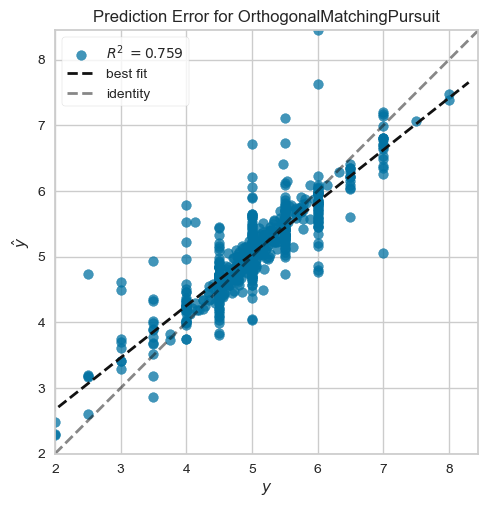

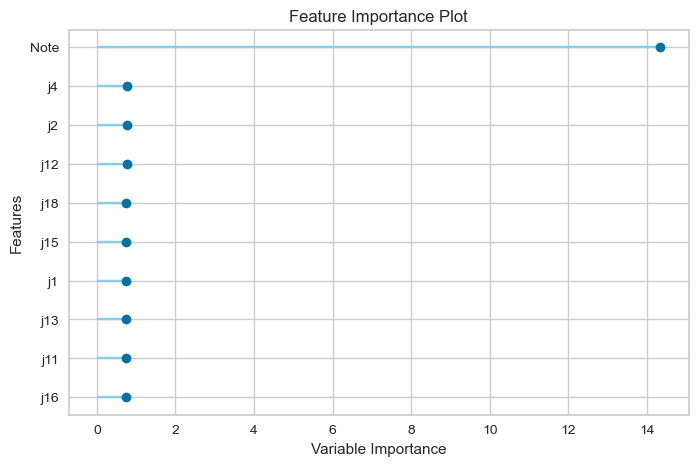

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,0.2269,0.1385,0.3721,0.7594,0.0637,0.0484


,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Espino Alfonso,DL,10.0,12.0,4.53,4.53,4.76,18,18,37,1.04,...,8,12,29,-17,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.623846
Zappacosta Davide,DL,1.0,2.0,4.90,0.00,4.85,5,0,20,0.65,...,4,37,23,14,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.90,4.851725
Jubal,DC,11.0,14.0,4.66,4.66,5.06,19,19,36,1.25,...,12,16,41,-25,3.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,5.019042
Achi Mohamed,MD,1.0,1.0,5.00,0.00,5.00,2,0,3,0.00,...,6,21,24,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.00,5.146244
Seoane Jaime,MD,8.0,8.0,4.95,5.50,4.95,11,1,11,0.35,...,9,16,25,-9,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.95,4.988202
Bellanova Raoul,DL,10.0,10.0,5.06,0.00,4.88,9,0,25,0.17,...,5,38,24,14,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,5.06,5.280960
Sala Jacopo,DL,1.0,1.0,4.67,0.00,4.68,6,0,11,0.41,...,9,17,30,-13,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.67,4.574635
Mateta Jean-Philippe,A,6.0,6.0,4.59,4.38,4.80,16,4,35,0.55,...,8,18,27,-9,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.291606
Oukidja Alexandre,G,15.0,17.0,5.20,5.40,5.18,15,10,19,1.22,...,6,31,22,9,2.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,6.00,5.822206


In [5]:
exp.plot_model(best_model, plot = 'error')
exp.plot_model(best_model, plot = 'feature')
exp.predict_model(best_model).head(10)

In [36]:
total_df_pca = total_df.drop('Date' ,axis = 1)
oh = ['Poste','Club','Prochain opposant','Championnat','Classement_range','Note_range','Enchère_moy_range']
total_df_oneh = total_df_pca[oh]
oneh = OneHotEncoder()

total_df_oneh = oneh.fit_transform(total_df_oneh)
encoded_total_df = pd.DataFrame(total_df_oneh.toarray(),columns=oneh.get_feature_names_out(oh), index=total_df_pca.index)
total_df_pca = total_df_pca.drop(oh, axis = 1)

In [51]:

total_df_pca_2 = total_df_pca.merge( encoded_total_df, left_index=True, right_index=True)
total_df_pca_2['DMI'] = total_df_pca_2['DMI'].str.replace(',', '.')


Text(0.5, 1.0, 'PCA du Dataframe Total')

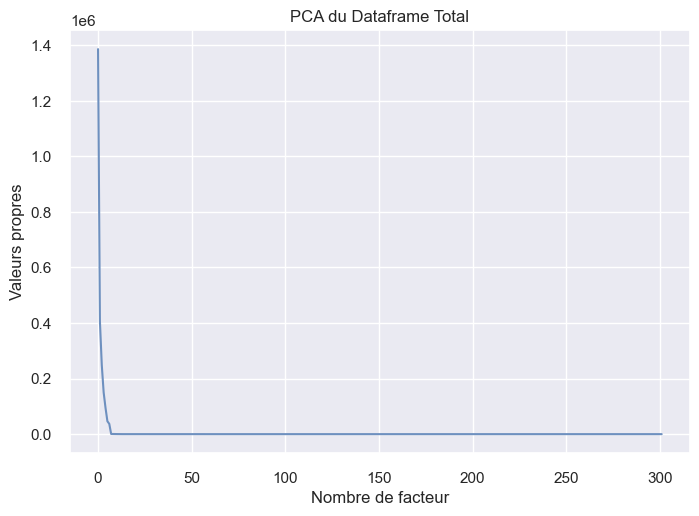

In [61]:
pca2 = PCA()
Coord = pca2.fit_transform(total_df_pca_2)

plt.plot(np.arange(0, 302), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres')
plt.title('PCA du Dataframe Total')

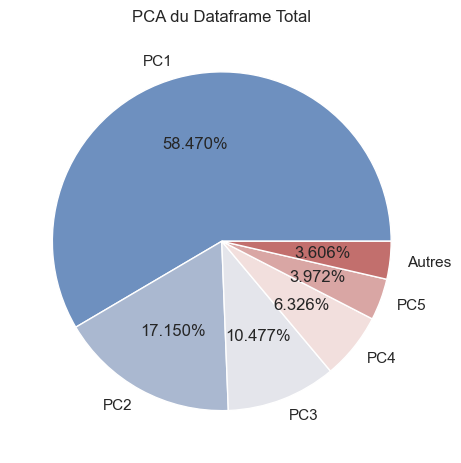

In [62]:
L1 = list(pca2.explained_variance_ratio_[0:5])
L1.append(sum(pca2.explained_variance_ratio_[5:302]))

plt.pie(L1, labels=['PC1','PC2','PC3','PC4','PC5','Autres'], 
        autopct='%1.3f%%')
plt.title('PCA du Dataframe Total')
plt.show()

### GARDIENS

In [6]:
G_total_df = total_df[(total_df['Poste'] == 'G')]
G_total_df =G_total_df.drop(['Min/But', 'Min note/but', '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 
           'Pass decis.', 'Occas° créée', 'Min/But 1 an', 'But/surface', 'But/Coup-franc','But/Peno', 
           'Corner gagné'], axis = 1)
G_total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,
Donnarumma Gianluigi,G,17.0,22.0,5.79,5.79,5.70,19,19,28,1.23,...,15,2,2,48,14,34,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Chevalier Lucas,G,15.0,17.0,5.50,5.50,5.42,13,13,31,1.04,...,10,4,5,35,25,10,2.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
Léo Jardim,G,7.0,8.0,4.17,0.00,5.21,6,0,21,1.21,...,10,4,5,35,25,10,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
Mvogo Yvon,G,7.0,15.0,5.43,0.00,5.43,14,0,14,1.38,...,9,5,5,31,29,2,8.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20
Mannone Vito,G,15.0,15.0,5.25,5.25,5.25,6,6,6,1.41,...,9,5,5,31,29,2,0.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20


In [7]:
G_exp = RegressionExperiment()
G_exp.setup(G_total_df, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(159, 85)"
4,Transformed data shape,"(159, 555)"
5,Transformed train set shape,"(111, 555)"
6,Transformed test set shape,"(48, 555)"
7,Ordinal features,1
8,Numeric features,75
9,Categorical features,9


In [8]:
G_best_model = G_exp.compare_models(exclude = 'lar')
print(G_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6138,0.8356,0.8516,0.1723,0.1472,0.1369,1.3900
ada,AdaBoost Regressor,0.6558,0.8705,0.8727,0.1023,0.1513,0.1458,1.2950
et,Extra Trees Regressor,0.6356,0.8730,0.8798,0.0585,0.1521,0.1406,1.3810
br,Bayesian Ridge,0.7264,0.9282,0.9123,-0.0380,0.1585,0.1595,1.2420
gbr,Gradient Boosting Regressor,0.6946,0.9727,0.9300,-0.0409,0.1599,0.1519,1.3450
en,Elastic Net,0.7915,1.0864,0.9773,-0.0929,0.1693,0.1750,1.4980
lasso,Lasso Regression,0.7961,1.1077,0.9833,-0.0941,0.1704,0.1765,1.3110
llar,Lasso Least Angle Regression,0.7961,1.1077,0.9833,-0.0941,0.1704,0.1765,1.2820
dummy,Dummy Regressor,0.8204,1.1405,1.0010,-0.1047,0.1736,0.1842,1.2400
knn,K Neighbors Regressor,0.8369,1.1961,1.0245,-0.1650,0.1772,0.1868,1.2480


RandomForestRegressor(n_jobs=-1, random_state=124)


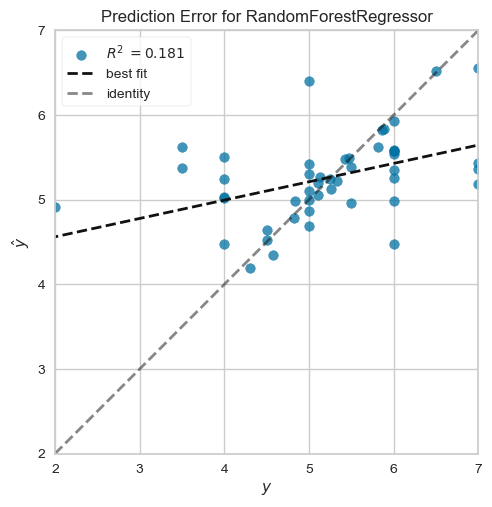

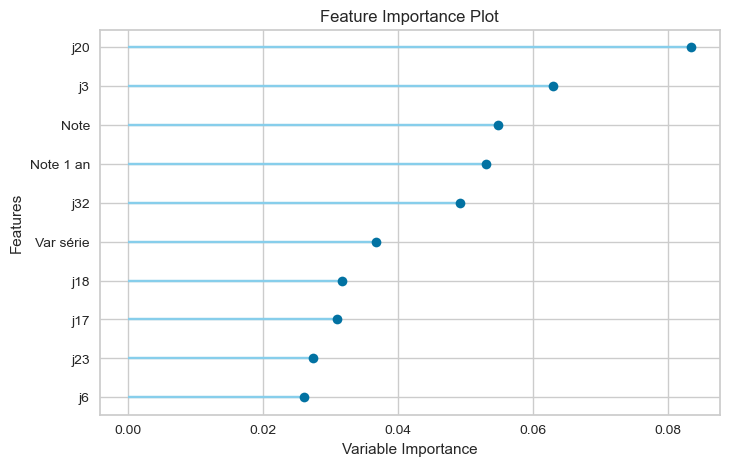

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5897,0.8184,0.9047,0.1813,0.1639,0.1380


,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Riou Rémy,G,7.0,7.0,5.25,0.00,5.50,4,0,18,0.65,...,8,28,23,5,0.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.25,5.2435
Szczesny Wojciech,G,17.0,24.0,5.58,5.40,5.65,13,5,30,1.22,...,3,30,15,15,7.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40,4.00,5.5029
Pacheco Fernando,G,7.0,8.0,6.00,0.00,4.94,1,0,18,0.00,...,9,18,26,-8,1.0,3 - 10-15,4 - entre 6 et 8,1 - moins de 20,6.00,5.5413
Oblak Jan,G,16.0,21.0,5.28,5.13,5.25,16,8,36,0.73,...,5,27,16,11,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,5.00,5.1002
Sauvage Alexis,G,13.0,16.0,4.75,4.00,4.75,16,4,16,1.15,...,10,25,31,-6,3.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,6.00,4.4740
Omlin Jonas,G,15.0,15.0,5.29,4.90,5.21,14,5,29,1.44,...,12,28,40,-12,0.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.00,4.4781
Consigli Andrea,G,14.0,17.0,4.82,0.00,4.99,17,0,35,1.12,...,10,18,29,-11,3.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.82,4.7807
Pickford Jordan,G,17.0,19.0,5.37,5.04,5.33,19,13,38,1.31,...,11,15,28,-13,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,3.50,5.6234
Filipovic Ivan,G,10.0,13.0,5.11,0.00,5.20,14,0,15,1.15,...,6,17,19,-2,3.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.11,5.0564


In [9]:
G_exp.plot_model(G_best_model, plot = 'error')
G_exp.plot_model(G_best_model, plot = 'feature')
G_exp.predict_model(G_best_model).head(10)

### DEFENSEURS

In [10]:
D_total_df = total_df[(total_df['Poste'] == 'DC')|(total_df['Poste'] == 'DL')]
D_total_df = D_total_df.drop(['But évité', 'Action stoppée'], axis = 1)
D_total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,...,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Marquinhos,DC,28.0,33.0,5.69,5.13,5.58,18,4,37,0.79,...,15,2,2,48,14,34,5.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Nuno Mendes,DL,13.0,17.0,5.50,0.00,5.23,12,0,30,0.77,...,15,2,2,48,14,34,4.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Bernat Juan,DL,10.0,13.0,5.42,5.25,5.31,13,2,21,0.73,...,15,2,2,48,14,34,3.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Ramos Sergio,DC,12.0,16.0,5.26,5.14,5.34,17,7,28,0.77,...,15,2,2,48,14,34,4.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [11]:
D_exp = RegressionExperiment()
D_exp.setup(D_total_df, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(836, 98)"
4,Transformed data shape,"(836, 548)"
5,Transformed train set shape,"(585, 548)"
6,Transformed test set shape,"(251, 548)"
7,Ordinal features,2
8,Numeric features,88
9,Categorical features,9


In [12]:
D_best_model = D_exp.compare_models(exclude = 'lar')
print(D_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2494,0.1350,0.3602,0.7358,0.0618,0.0521,1.3590
lr,Linear Regression,0.2889,0.1772,0.4043,0.6282,0.0694,0.0598,1.2960
omp,Orthogonal Matching Pursuit,0.3207,0.2415,0.4646,0.5335,0.0806,0.0676,1.3070
ridge,Ridge Regression,0.3781,0.2829,0.5249,0.4693,0.0920,0.0811,1.2820
rf,Random Forest Regressor,0.3517,0.3215,0.5538,0.4303,0.0980,0.0771,1.7200
et,Extra Trees Regressor,0.3503,0.3243,0.5557,0.4295,0.0984,0.0769,1.6010
gbr,Gradient Boosting Regressor,0.3765,0.3262,0.5589,0.4207,0.0994,0.0823,1.4870
ada,AdaBoost Regressor,0.4479,0.3902,0.6156,0.2795,0.1082,0.0961,1.4700
en,Elastic Net,0.4926,0.5122,0.7008,0.0902,0.1230,0.1081,1.2970
lasso,Lasso Regression,0.4922,0.5149,0.7024,0.0865,0.1233,0.1082,1.2680


BayesianRidge()


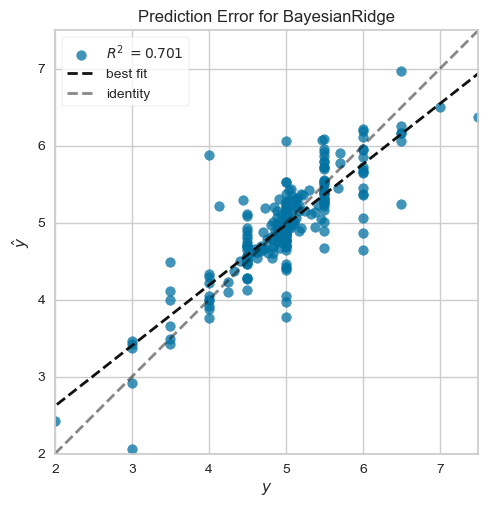

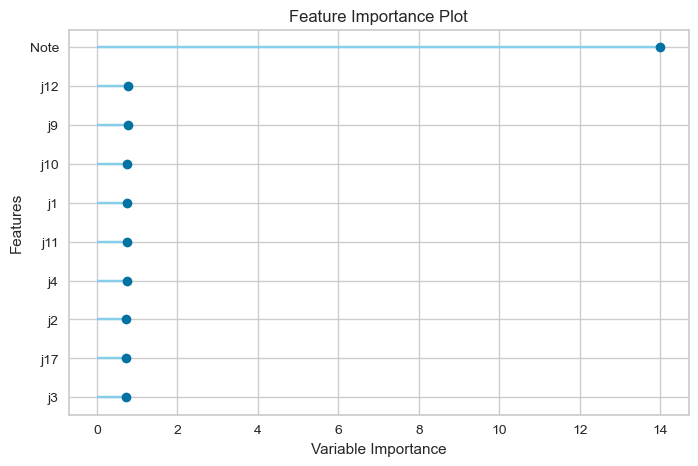

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2463,0.1363,0.3691,0.7008,0.0636,0.0506


,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Abner,DC,7.0,8.0,4.50,4.50,4.50,1,1,1,0.00,...,5,19,14,5,1.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.50,4.276821
Martínez Lucas,DC,13.0,15.0,5.50,0.00,5.07,14,0,21,1.02,...,8,21,25,-4,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.50,6.090449
Angileri Fabrizio,DL,1.0,2.0,4.00,0.00,4.00,8,0,8,1.22,...,9,16,25,-9,1.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.00,3.875513
Jonathan Buatu,DC,12.0,14.0,5.13,5.13,5.13,12,12,12,0.43,...,6,17,18,-1,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.707734
Wan-Bissaka Aaron,DL,1.0,2.0,5.29,5.40,4.89,7,5,14,0.49,...,5,32,25,7,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,5.50,5.161685
Abdi Ali,DL,10.0,12.0,5.21,4.88,5.10,14,8,30,0.83,...,5,23,20,3,2.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,4.50,4.744172
Lykogiannis Charalampos,DL,11.0,12.0,4.93,0.00,4.81,15,0,24,0.50,...,8,23,29,-6,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.93,4.759695
Zeze Nathan,DC,1.0,1.0,5.50,5.50,5.50,1,1,1,0.00,...,6,21,24,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.50,5.787938
Bella-Kotchap Armel,DC,10.0,12.0,4.96,0.00,4.96,13,0,13,0.88,...,13,17,35,-18,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.935781


In [13]:
D_exp.plot_model(D_best_model, plot = 'error')
D_exp.plot_model(D_best_model, plot = 'feature')
D_exp.predict_model(D_best_model).head(10)

### MILIEUX

In [14]:
M_total_df = total_df[(total_df['Poste'] == 'MO')|(total_df['Poste'] == 'MD')]
M_total_df = M_total_df.drop(['But évité', 'Action stoppée'], axis = 1)
M_total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,...,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Soler Carlos,MO,13.0,15.0,5.45,5.50,5.52,11,10,30,0.99,...,15,2,2,48,14,34,2.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Renato Sanches,MO,12.0,13.0,5.18,4.50,5.12,11,1,25,0.64,...,15,2,2,48,14,34,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Danilo Pereira,MD,13.0,14.0,5.61,5.17,5.91,14,3,29,0.84,...,15,2,2,48,14,34,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20
Verratti Marco,MD,22.0,29.0,5.78,0.00,6.05,16,0,31,0.89,...,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40


In [15]:
M_exp = RegressionExperiment()
M_exp.setup(M_total_df, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(900, 98)"
4,Transformed data shape,"(900, 551)"
5,Transformed train set shape,"(630, 551)"
6,Transformed test set shape,"(270, 551)"
7,Ordinal features,1
8,Numeric features,88
9,Categorical features,9


In [16]:
M_best_model = M_exp.compare_models(exclude = 'lar')
print(M_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2774,0.1845,0.4249,0.6641,0.0651,0.0531,1.4140
ridge,Ridge Regression,0.3836,0.3283,0.5670,0.4187,0.0904,0.0754,1.3320
et,Extra Trees Regressor,0.3813,0.4006,0.6293,0.2822,0.1011,0.0758,1.7460
rf,Random Forest Regressor,0.3889,0.4154,0.6414,0.2465,0.1024,0.0769,1.8560
gbr,Gradient Boosting Regressor,0.4123,0.4245,0.6462,0.2411,0.1027,0.0814,1.5170
ada,AdaBoost Regressor,0.4522,0.4574,0.6709,0.1846,0.1072,0.0895,1.5270
omp,Orthogonal Matching Pursuit,0.4783,0.4971,0.6993,0.1232,0.1119,0.0943,1.3130
en,Elastic Net,0.4740,0.5197,0.7154,0.0808,0.1153,0.0947,1.3070
lasso,Lasso Regression,0.4777,0.5233,0.7178,0.0752,0.1157,0.0954,1.3090
llar,Lasso Least Angle Regression,0.4777,0.5233,0.7178,0.0752,0.1157,0.0954,1.3140


BayesianRidge()


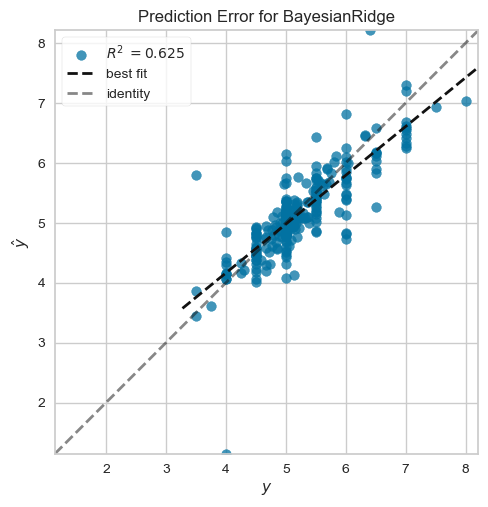

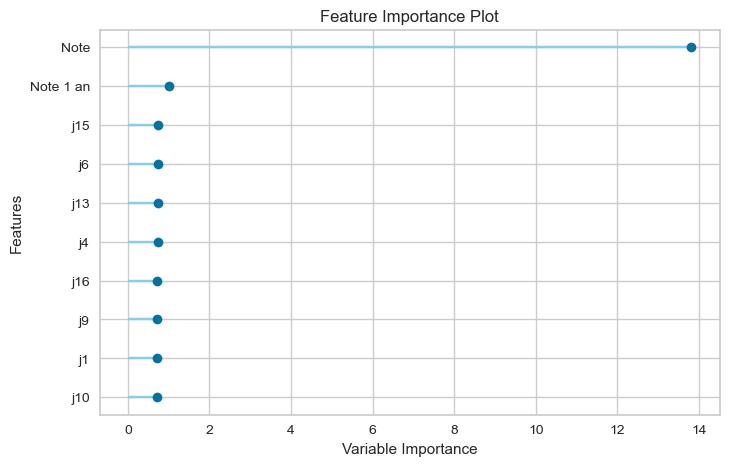

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2823,0.1891,0.4348,0.6254,0.0813,0.0543


,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Roca Marc,MD,12.0,14.0,5.03,5.03,5.03,19,19,19,0.63,...,9,26,33,-7,2.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,5.00,4.319281
Tonali Sandro,MD,22.0,29.0,5.67,0.00,5.80,15,0,32,0.90,...,2,35,20,15,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,5.67,5.649371
Diatta Krépin,MO,11.0,12.0,5.50,6.50,5.50,16,3,16,1.02,...,4,42,26,16,1.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20,8.00,7.036207
Moi Gómez,MO,15.0,19.0,5.81,5.81,5.53,18,18,31,0.94,...,6,18,17,1,4.0,2 - 5-10,3 - entre 4 et 6,1 - moins de 20,5.81,6.021948
Agoumé Lucien,MD,1.0,2.0,5.33,0.00,5.18,3,0,17,0.58,...,9,30,40,-10,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.33,5.661096
Lopez Maxime,MO,19.0,21.0,5.21,0.00,5.35,14,0,31,1.12,...,10,18,29,-11,2.0,4 - 15-20,3 - entre 4 et 6,2 - entre 20 et 40,5.21,5.758033
Golovin Aleksandr,MO,20.0,26.0,5.97,5.97,5.80,18,18,32,0.96,...,4,42,26,16,6.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,6.00,6.097665
Hjulmand Morten,MO,17.0,19.0,5.56,5.25,5.56,17,2,17,1.10,...,7,18,22,-4,2.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.898674
Kouyaté Cheikhou,MD,12.0,12.0,5.08,0.00,5.21,12,0,24,1.35,...,9,16,35,-19,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.08,4.718321


In [17]:
M_exp.plot_model(M_best_model, plot = 'error')
M_exp.plot_model(M_best_model, plot = 'feature')
M_exp.predict_model(M_best_model).head(10)

### ATTAQUANTS

In [18]:
A_total_df = total_df[(total_df['Poste'] == 'A')]
A_total_df = A_total_df.drop(['But évité', 'Action stoppée'], axis = 1)
A_total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,...,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,...,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,...,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
David Jonathan,A,38.0,63.0,5.89,5.89,5.30,19,19,38,1.46,...,10,4,5,35,25,10,25.0,2 - 5-10,3 - entre 4 et 6,4 - entre 60 et 80
Bayo Mohamed,A,17.0,20.0,4.83,6.00,4.93,12,2,27,1.15,...,10,4,5,35,25,10,3.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40


In [19]:
A_exp = RegressionExperiment()
A_exp.setup(A_total_df, target = 'j19', session_id = 124)

,Description,Value
0,Session id,124
1,Target,j19
2,Target type,Regression
3,Original data shape,"(460, 98)"
4,Transformed data shape,"(460, 552)"
5,Transformed train set shape,"(322, 552)"
6,Transformed test set shape,"(138, 552)"
7,Numeric features,88
8,Categorical features,9
9,Preprocess,True


In [20]:
A_best_model = A_exp.compare_models(exclude = 'lar')
print(A_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5025,0.5763,0.7455,0.1877,0.1228,0.1045,1.4910
rf,Random Forest Regressor,0.4719,0.5855,0.7553,0.1876,0.1240,0.0981,1.6200
et,Extra Trees Regressor,0.4766,0.5933,0.7596,0.1756,0.1241,0.0985,1.5430
ada,AdaBoost Regressor,0.5299,0.6106,0.7741,0.1333,0.1272,0.1103,1.4320
en,Elastic Net,0.5578,0.6488,0.7952,0.1016,0.1305,0.1156,1.3390
ridge,Ridge Regression,0.5597,0.6249,0.7783,0.1004,0.1292,0.1162,1.3400
br,Bayesian Ridge,0.5668,0.6587,0.7994,0.0978,0.1312,0.1176,1.3380
lasso,Lasso Regression,0.5664,0.6613,0.8010,0.0933,0.1315,0.1174,1.3550
llar,Lasso Least Angle Regression,0.5664,0.6613,0.8010,0.0933,0.1315,0.1174,1.3800
huber,Huber Regressor,0.5864,0.6466,0.7993,0.0751,0.1319,0.1214,1.4420


GradientBoostingRegressor(random_state=124)


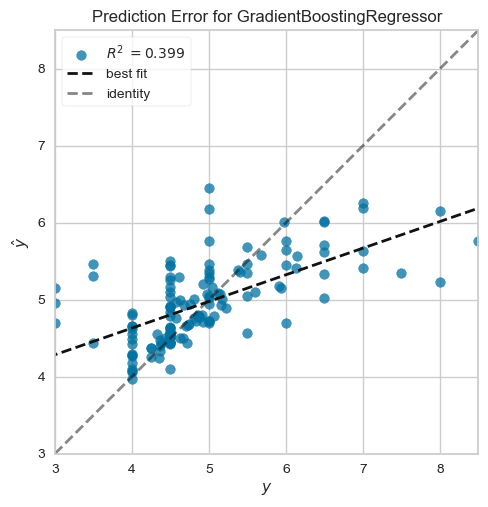

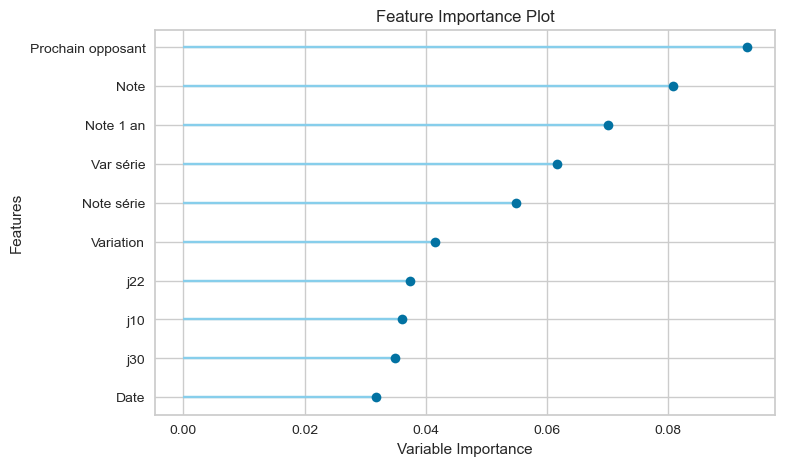

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4762,0.5471,0.7397,0.3985,0.1193,0.0977


,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,...,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range,j19,prediction_label
Joueur,,,,,,,,,,,,,,,,,,,,,
Morales José,A,21.0,29.0,4.68,4.75,5.19,17,4,34,0.58,...,5,21,13,8,8.0,2 - 5-10,3 - entre 4 et 6,2 - entre 20 et 40,4.68,4.937306
Lookman Ademola,A,22.0,40.0,5.94,8.00,5.51,18,2,34,1.26,...,4,37,23,14,18.0,2 - 5-10,3 - entre 4 et 6,3 - entre 40 et 60,8.00,6.153352
Simeone Giovanni,A,19.0,23.0,4.80,4.50,4.60,10,1,26,0.67,...,1,46,14,32,4.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40,4.50,4.646803
Luvambo Taylor,A,7.0,7.0,5.40,0.00,5.40,5,0,5,0.96,...,7,24,27,-3,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,5.40,5.364210
Broja Armando,A,1.0,2.0,4.63,0.00,4.60,12,0,31,0.68,...,7,22,21,1,1.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.63,4.504447
Sterling Raheem,A,31.0,48.0,5.10,0.00,5.53,15,0,30,1.23,...,7,22,21,1,17.0,3 - 10-15,3 - entre 4 et 6,3 - entre 40 et 60,4.50,5.097014
Surridge Sam,A,6.0,6.0,4.54,4.71,4.54,13,7,13,0.48,...,9,16,35,-19,0.0,3 - 10-15,3 - entre 4 et 6,1 - moins de 20,4.50,4.515325
Vinícius Júnior,A,43.0,84.0,5.94,5.94,5.94,17,17,33,1.01,...,2,38,16,22,41.0,1 - 1-5,3 - entre 4 et 6,5 - 80 et plus,5.94,5.155985
Hunou Adrien,A,13.0,17.0,5.06,5.03,5.06,18,15,18,1.03,...,15,17,41,-24,4.0,4 - 15-20,3 - entre 4 et 6,1 - moins de 20,4.50,4.835808


In [21]:
A_exp.plot_model(A_best_model, plot = 'error')
A_exp.plot_model(A_best_model, plot = 'feature')
A_exp.predict_model(A_best_model).head(10)